In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("https://raw.githubusercontent.com/RamiKrispin/coronavirus/master/csv/coronavirus.csv")
data.head()        #display first 5 rows

,date,province,country,lat,long,type,cases
0,2020-01-22,NaN,Afghanistan,33.93911,67.709953,confirmed,0
1,2020-01-23,NaN,Afghanistan,33.93911,67.709953,confirmed,0
2,2020-01-24,NaN,Afghanistan,33.93911,67.709953,confirmed,0
3,2020-01-25,NaN,Afghanistan,33.93911,67.709953,confirmed,0
4,2020-01-26,NaN,Afghanistan,33.93911,67.709953,confirmed,0


In [5]:
#to remove columns that do not contribute to our study
data=data.drop("lat",axis=1)        
data=data.drop("long",axis=1)
data=data.drop("province",axis=1)

In [6]:
data.info()        #concise summary of given DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148365 entries, 0 to 148364
Data columns (total 4 columns):
date       148365 non-null object
country    148365 non-null object
type       148365 non-null object
cases      148365 non-null int64
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [15]:
data.shape      #total no. of rows and columns

(148365, 4)

In [9]:
country_list=list(data['country'].unique())        
print(len(country_list))        #no. of countries covered in our dataset

188


Text(0.5, 0, 'Country')

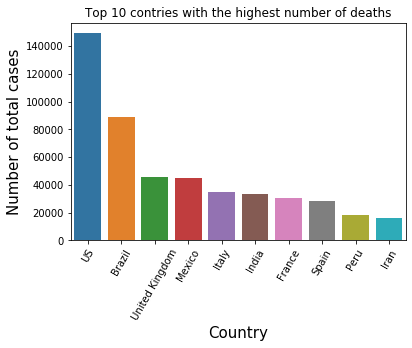

In [11]:
data_top10=data[data['type'] == 'death'].groupby(['country']).sum().reset_index(drop=None)  #total no. of deaths in each country
sns.axes_style("whitegrid")
sns.barplot(
x="country", 
y="cases",
    data=data_top10.nlargest(10,'cases')        #to display top 10 countries
)
plt.xticks(rotation=60)
plt.title("Top 10 contries with the highest number of deaths")
plt.ylabel('Number of total cases',fontsize=15)
plt.xlabel('Country',fontsize=15)

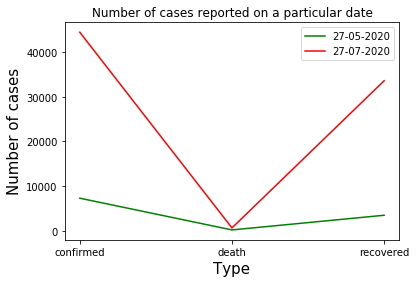

In [13]:
data_country=data[data['country']=='India']        #only data from India 

#total no. of cases reported on a day grouped by the type of case
data_may=data_country[data_country['date'] == '2020-05-27'].groupby(['type']).sum().reset_index(drop=None)  
data_july=data_country[data_country['date'] == '2020-07-27'].groupby(['type']).sum().reset_index(drop=None)

plt.plot('type', 'cases', data=data_may, color='green',label='27-05-2020')
plt.plot('type', 'cases', data=data_july, color='red',label='27-07-2020')
plt.title("Number of cases reported on a particular date")
plt.ylabel('Number of cases',fontsize=15)
plt.xlabel('Type',fontsize=15)
plt.legend()
plt.show()